<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [7]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


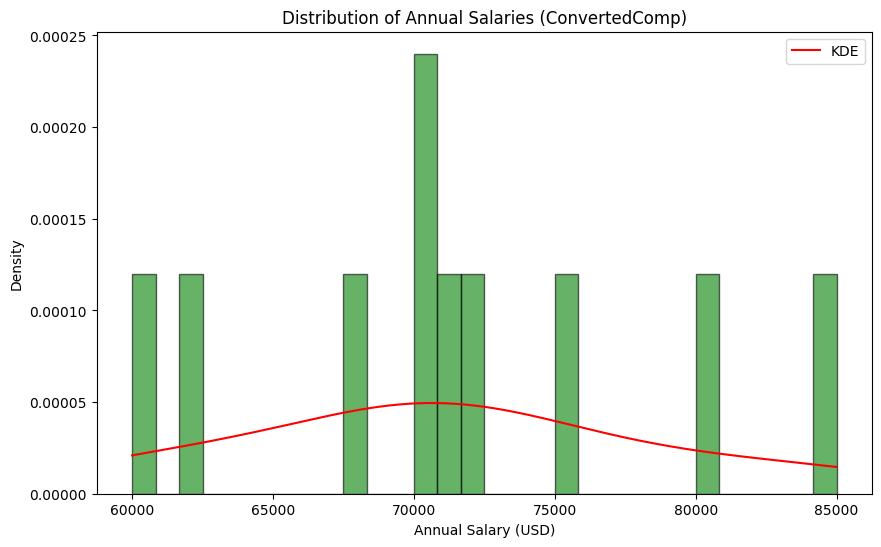

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000]
}
df = pd.DataFrame(data)

# Data for plotting
salaries = df['ConvertedComp'].dropna()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Add KDE
kde = gaussian_kde(salaries)
x = np.linspace(salaries.min(), salaries.max(), 1000)
plt.plot(x, kde(x), color='r', label='KDE')

# Add titles and labels
plt.title('Distribution of Annual Salaries (ConvertedComp)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


Plot the histogram for the column `ConvertedComp`.


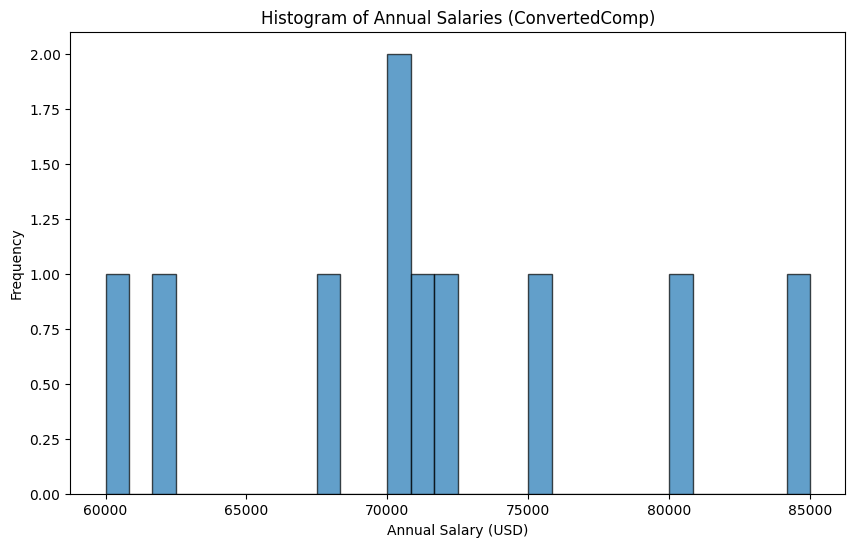

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000]
}
df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Annual Salaries (ConvertedComp)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')

# Show the plot
plt.show()



What is the median of the column `ConvertedComp`?


In [17]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000]
}
df = pd.DataFrame(data)

# Calculate the median
median_salary = df['ConvertedComp'].median()
print(f'The median salary is: ${median_salary:.2f}')



The median salary is: $70500.00


How many responders identified themselves only as a **Man**?


In [18]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Gender': ['Man', 'Man', 'Woman', 'Non-binary', 'Man', 'Man', 'Woman', 'Man']
}
df = pd.DataFrame(data)

# Count the number of responders identified as "Man"
count_men = df['Gender'].value_counts().get('Man', 0)
print(f'Number of responders identified as "Man": {count_men}')



Number of responders identified as "Man": 5


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Gender': ['Man', 'Woman', 'Woman', 'Man', 'Woman', 'Man', 'Woman'],
    'ConvertedComp': [60000, 70000, 75000, 72000, 68000, 69000, 71000]
}
df = pd.DataFrame(data)

# Filter the DataFrame for responders identified as "Woman"
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of ConvertedComp for these responders
median_women_salary = women_df['ConvertedComp'].median()
print(f'The median salary for responders identified as "Woman" is: ${median_women_salary:.2f}')


The median salary for responders identified as "Woman" is: $70500.00


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Age': [22, 25, 30, 28, 35, 40, 29, 33, 45, 50]
}
df = pd.DataFrame(data)

# Calculate the five-number summary
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])
print('Five-number summary for the Age column:')
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])



Five-number summary for the Age column:
min    22.00
25%    28.25
50%    31.50
75%    38.75
max    50.00
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


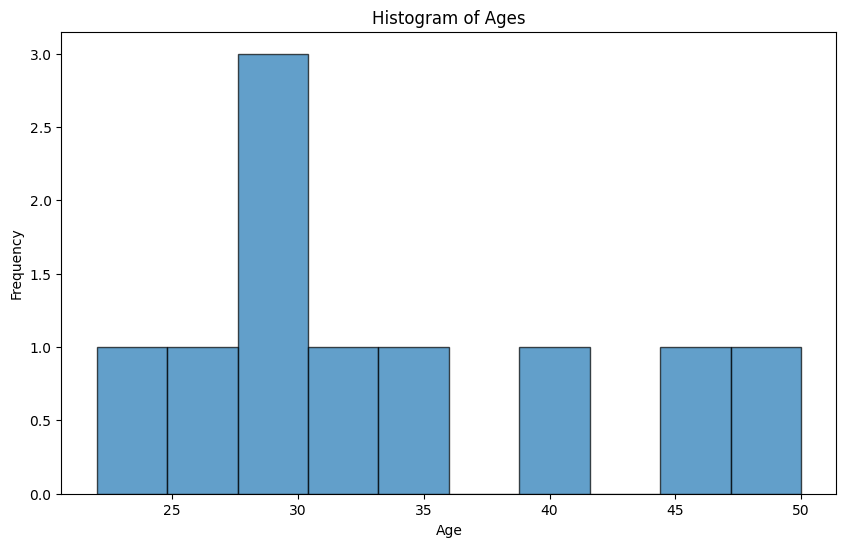

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Age': [22, 25, 30, 28, 35, 40, 29, 33, 45, 50]
}
df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=10, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


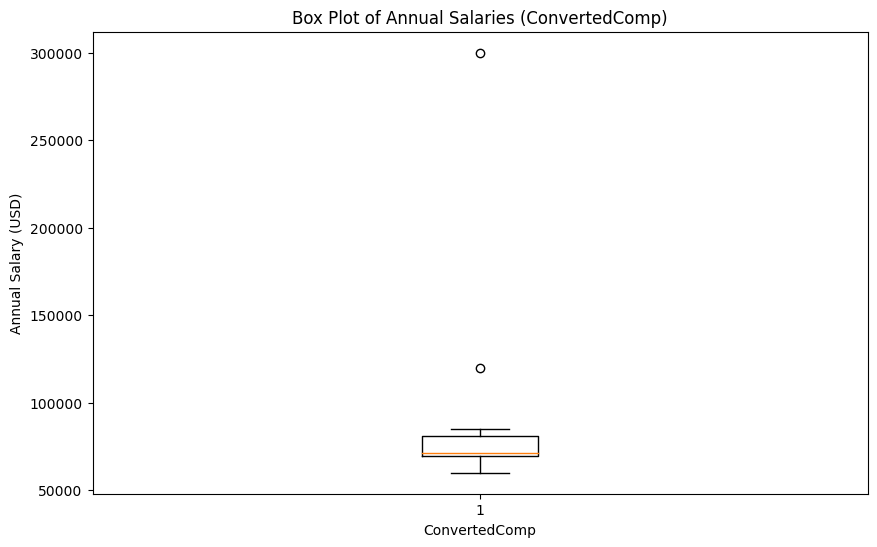

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000, 120000, 300000]
}
df = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna())

# Add titles and labels
plt.title('Box Plot of Annual Salaries (ConvertedComp)')
plt.xlabel('ConvertedComp')
plt.ylabel('Annual Salary (USD)')

# Show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000, 120000, 300000]
}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f'The Interquartile Range (IQR) for the ConvertedComp column is: ${IQR:.2f}')


The Interquartile Range (IQR) for the ConvertedComp column is: $11750.00


Find out the upper and lower bounds.


In [27]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000, 120000, 300000]
}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound for outliers: ${lower_bound:.2f}')
print(f'Upper bound for outliers: ${upper_bound:.2f}')



Lower bound for outliers: $51875.00
Upper bound for outliers: $98875.00


Identify how many outliers are there in the `ConvertedComp` column.


In [29]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000, 120000, 300000]
}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f'Number of outliers in the ConvertedComp column: {num_outliers}')


Number of outliers in the ConvertedComp column: 2


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000, 120000, 300000]
}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing outliers
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame
print('DataFrame after removing outliers:')
print(filtered_df)



DataFrame after removing outliers:
   ConvertedComp
0          60000
1          70000
2          80000
3          75000
4          62000
5          72000
6          85000
7          70000
8          68000
9          71000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
import pandas as pd

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Age': [22, 25, 30, 28, 35, 40, 29, 33, 45, 50],
    'ConvertedComp': [60000, 70000, 80000, 75000, 62000, 72000, 85000, 70000, 68000, 71000],
    'Experience': [1, 2, 5, 3, 6, 8, 4, 7, 10, 12]  # Example numerical column
}
df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'Age'
age_correlation = correlation_matrix['Age']

# Display the correlations with 'Age'
print('Correlation of Age with other numerical columns:')
print(age_correlation)



Correlation of Age with other numerical columns:
Age              1.000000
ConvertedComp   -0.038371
Experience       0.984805
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
